densebox发表于15年的论文"DenseBox: Unifying Landmark Localization with
End to End Object Detection"，与yolov1一起，是最早的anchor-free目标检测方法。

$densebox结构如下图所示，输入mxnx3的图像，输出\frac{m}{4}x\frac{n}{4}x1（densebox的初\\衷是用于face detection，只有1类）的特征\\图，输出特征图的每个位置包括5维信息：类别\\置信度与位置偏移（相对于左上角与右下角坐标的偏移）$
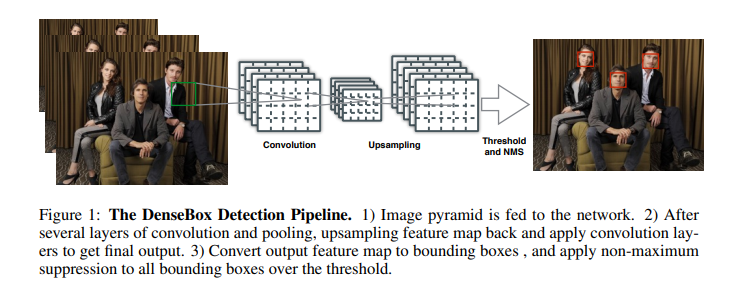

$在推理时，事先定义目标框的左上角坐标与右下角坐标为p_t=(x_t, y_t)，p_b=(x_b, y_b)，然\\后输出5维向量\hat{t_i}=\{\hat s, dx^t=\hat x_i-x_t, d\hat y^t = y_i - y_t, d\hat x^b\\ = x_i-x_b, d\hat y^b = y_i-y_b\}_i，对输出进行解码，然后用阈值过滤与NMS得到最终结果$

GT生成：在训练时，不是将整幅图像输入网络，而是将输入进行crop，文章将输入crop成240x240大小的区域，人脸在中间位置，尺寸为50x50。gt特征图下采样4倍，变为60x60，第一维的positive区域为以特征图中心为中心的一个圆，其半径为bbox的0.3倍，其他4维的值为相对于left-top与right-bottom的偏移。
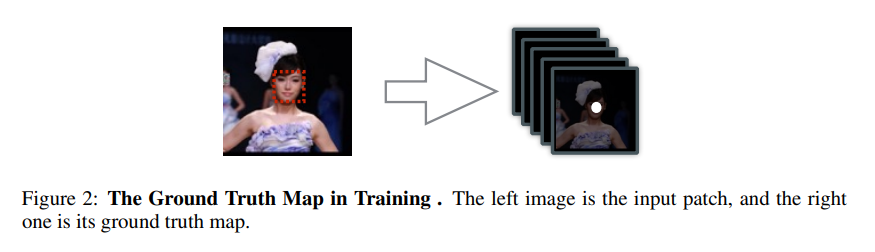

Densebox的结构如下图：
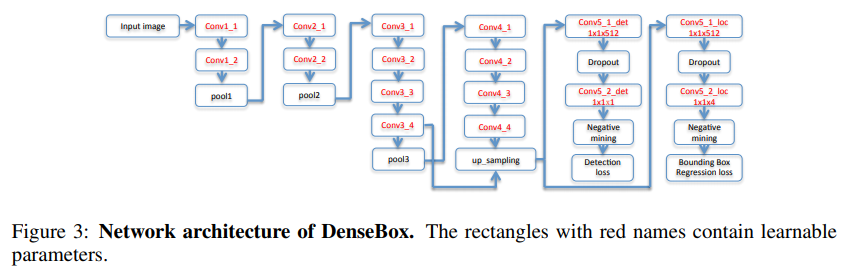

loss函数：<br/>
cls loss用L2 loss:
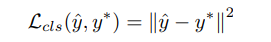

loc loss同样用l2 loss:
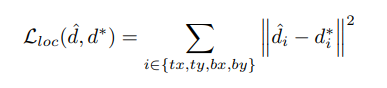

此外，densebox输入为图像金字塔，还有一个mask分支，用了难例挖掘。